### Objective of this kernel
- Basics of data preparation and how to clean data including missing value treatment 
- Graphical exploration of data for relevant insights and to create additional meaningful features
- Hypothesis testing
- Variable selection for modeling

In [1]:
from IPython.display import Image
Image(url='https://entrackr.com/wp-content/uploads/2019/10/startup-image-01__1506587489_150.242.73.142-1200x600.jpg')

### Why do startups succeed?
- I found some good research from Harvard Business School, Performance Persistence in Entrepreneurship, which suggest that serial entrepreneurs that have prior success are more likely to have success, and that the best VCs are good at picking serial entrepreneurs.
- main reasons why startup succeeds
    - Founders are driven by impact, resulting in passion and commitment
    - Commitment to stay the course and stick with a chosen path
    - Willingness to adjust, but not constantly adjusting
    - Patience and persistence due to the timing mismatch of expectations and reality
    - Willingness to observe, listen and learn
    - Develop the right mentoring relationships
    - Leadership with general and domain specific business knowledge
    - Implementing “Lean Startup” principles: Raising just enough money in a funding round to hit the next set of key milestones
    - Balance of technical and business knowledge, with necessary technical expertise in product development


### Why do startups fail?
- According to an article in FastCompany, "Why Most Venture Backed Companies Fail," 75 percent of venture-backed startups fail. This statistic is based on a Harvard Business School study . In a study by Statistic Brain, Startup Business Failure Rate by Industry, the failure rate of all U.S. companies after five years was over 50 percent, and over 70 percent after 10 years. 

- This study also asked company leadership the reason for business failure, giving a list of four main reasons for failure with sub-categories below those.

    - Lack of focus
    - Lack of motivation, commitment and passion
    - Too much pride, resulting in an unwillingness to see or listen
    - Taking advice from the wrong people
    - Lacking good mentorship
    - Lack of general and domain-specific business knowledge: finance, operations, and marketing
    - Raising too much money too soon
    - All of these focus on the decision-making of the entrepreneur and general business knowledge.


- In another study, CB Insights looked at the post-mortems of 101 startups to compile a list of the Top 20 Reasons Startups Fail. The focus was on company level reasons for failure. I think this list is instructive, but each of these reasons for failure is due to a failure in leadership at some level. The top nine most significant from this study are:

    - No market need
    - Ran out of cash
    - Not the right team
    - Got outcompeted
    - Pricing/cost issue
    - Poor product
    - Need/lack business model
    - Poor marketing
    - Ignore customers


# *Importing libraries*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')
import missingno as msno

# *Reading the dataset*

In [3]:
missing=["No Info","None","none"]
df=pd.read_csv("dataset/startup_analysis/CAX_Startup_Data.csv",na_values=missing)

In [4]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distributi

In [5]:
colss=["Percent_skill_Entrepreneurship","Percent_skill_Operations","Percent_skill_Engineering","Percent_skill_Marketing","Percent_skill_Leadership",
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score']

In [6]:
# shape of the dataset
print("Shape of the dataset is {} rows and {} columns" .format(len(df),len(df.columns)))

Shape of the dataset is 472 rows and 116 columns


In [7]:
# renaming long column names to short ones :
df.rename(columns={'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 'Survival through recession, based on existence of the company through recession times':
                  "Survival through recession", "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"
                  :"Top forums talking about company/Model"},inplace=True)

In [8]:
# converting  Est. Founding Date and Last Funding Date from object to datetime
df["Est. Founding Date"]=pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"]=pd.to_datetime(df["Last Funding Date"])
# converting Last round of funding received (in milionUSD) from object to float
# it is object variable because it consists of a string "unknown amount" in it,so replacing it with nan and converting
# the particular column to float
df["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)
df["Last round of funding received (in milionUSD)"]=df["Last round of funding received (in milionUSD)"].astype(float)

In [9]:
# data types in the data set
dtypes=pd.DataFrame(df.dtypes,columns=["Data Types"])
dtypes

,Data Types
Company_Name,object
Dependent-Company Status,object
year of founding,float64
Age of company in years,float64
Internet Activity Score,float64
Short Description of company profile,object
Industry of company,object
Focus functions of company,object
Investors,object
Employee Count,float64


- **We can see that the data type of some of the columns are incorrect so we have to correct the data types of the columns**
    - but before correcting the data type we have to fill the missing values by nan values and then replace the nan values with suitable method   [mean,mode etc. ] so that the data types can be changed int,float or datetime etc.

In [10]:
"""# checking unique values in the categorical columns
cols=df.select_dtypes(include="object")
for col in cols:
    print(col)
    print("="*80)
    unique=df[col].unique()
    print(unique)
    print("="*80)"""

'# checking unique values in the categorical columns\ncols=df.select_dtypes(include="object")\nfor col in cols:\n    print(col)\n    print("="*80)\n    unique=df[col].unique()\n    print(unique)\n    print("="*80)'

- **As we can see that some of the columns contain multiple values which have same meaning so we have to replace these values** 
    - **Cloumns which have such values**
        - `Has the team size grown` ['No' 'Yes' 'yes' 0 'YES' nan]
            - replacing "yes","YES" ----> "Yes"
        - `Cloud or platform based serive/product?` ['Platform' 'cloud' 'Cloud' 'none' 'Both' 0]
            - replacing "cloud" ----> "Cloud"
        - `Local or global player` ['Global' 'Local' 'local' 'global' 'GLOBAL' 'LOCAL' 0 'GLObaL' 'local  ']
            - replacing "local","LOCAL" ----> "Local"
            - replacing "GLOBAL","GLObaL","global" ----> "Global"

In [11]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Company_Name,0,0.000000
Dependent-Company Status,0,0.000000
year of founding,59,12.500000
Age of company in years,59,12.500000
Internet Activity Score,65,13.771186
Short Description of company profile,149,31.567797
Industry of company,124,26.271186
Focus functions of company,30,6.355932
Investors,140,29.661017
Employee Count,166,35.169492


- **OBSERVATIONS**
    - **Columns which have more that 40% of missing values**
        - `Number of of Partners of company`		(81.56%)
        - `Degree from a Tier 1 or Tier 2 university?`	(49.15%)
        - `Top management similarity`	(59.7458)
        - `Number of of Research publications`		(70.76%)
        - `Employee benefits and salary structures`	(74.36%)
        - `Client Reputation`		(58.05%)
        - `Employees count MoM change`		(43.43%)
        - We need to drop the columns which have more that 40% missing values in it,so we will drop those columns.
    - **Strategy for missing values Imputation**
        - We need to impute the missing values in columns which have less that 40% missing values.
        - Impute the missing values as per the data type and  the distribution of the particular variable.
        - If the variable is continous then impute the missing value by `Mean,Median` based on the distribution of the variable.
        - And if the varibale is categorical then impute the missing value by using `Mode` of the variable.

In [12]:
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
year of founding,413.000000,2009.394673,2.607247,1997.000000,2008.000000,2010.000000,2011.000000,2013.000000
Age of company in years,413.000000,4.605327,2.607247,1.000000,3.000000,4.000000,6.000000,17.000000
Internet Activity Score,407.000000,114.159705,225.651419,-725.000000,-3.500000,60.000000,216.000000,1535.000000
Employee Count,306.000000,31.408497,62.673600,0.000000,4.250000,13.000000,31.000000,594.000000
Employees count MoM change,267.000000,-1.299625,23.967085,-100.000000,0.000000,0.000000,6.000000,50.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Investors in Seed,423.000000,1.546099,2.959782,0.000000,0.000000,0.000000,2.000000,24.000000
Number of Investors in Angel and or VC,423.000000,0.576832,1.396723,0.000000,0.000000,0.000000,0.000000,9.000000
Number of Co-founders,472.000000,1.868644,1.143481,0.000000,1.000000,2.000000,2.250000,7.000000
Number of of advisors,472.000000,1.016949,2.014736,0.000000,0.000000,0.000000,1.000000,13.000000


- **OBSERVATIONS** 
    - **Columns with very high range of values**
        - `Last Funding Amount`
        - `google page rank of company website`
        - As the values in this columns take very large range as compared to other features in the dataset we will have to scale down the vlaues in this columns.  

In [13]:
df.describe(include=["O"])

,Company_Name,Dependent-Company Status,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Country of company,Continent of company,Presence of a top angel or venture fund in previous round of investment,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,Capital intensive business,Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums talking about company/Model,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Experience in selling and building products,Top management similarity,Number of of Research publications,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Disruptiveness of technology,Survival through recession,Gartner hype cycle stage,Time to maturity of technology (in years)
count,472,472,323,348,442,332,421,401,401,375,424,453,441,452,452,452,450,462,461,463,463,463,459,429,448,454,446,87,467,467,466,467,467,437,467,467,463,442,466,469,349,392,387,387,369,371,377,385,240,356,190,138,388,386,388,390,389,121,383,386,472,387,390,387,198,389,387,336,390,374,300,300
unique,472,2,313,192,164,319,4,22,4,2,5,2,3,2,2,2,2,3,2,4,2,5,2,4,8,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3,3,2,3,3,148,2,2,3,3,3,2,3,3,2,2,3,4,2,2,2,2,2,2,3,2,2,2,3,3,5,4
top,Company1,Success,Big Data Analytics,Analytics,Operations,TechStars,No,United States,North America,No,low,No,Small,Yes,Yes,No,No,Service,No,Private,No,Structured,Yes,Platform,Local,Non-Linear,No,Few,No,No,No,No,No,No,No,No,No,No,Online,B2B,Low,High,Yes,Low,Bachelors,business,Yes,Yes,Tier_1,Medium,Medium,Many,Low,Low,No,No,Low,Bad,No,No,Yes,No,No,No,Low,No,Yes,No,Medium,Not Applicable,Plateau,2 to 5
freq,1,305,4,53,31,7,266,305,308,282,150,380,228,298,258,428,245,231,231,162,281,166,267,296,99,320,328,73,437,445,337,316,436,321,251,395,411,335,410,307,243,271,246,178,169,22,281,301,139,147,88,81,185,178,198,330,253,42,277,294,252,311,380,329,119,216,218,285,189,268,85,180


- **OBSERVATIONS**
    - From the above dataframe we can see that some of the categorical variables have large number of unique values,we usually call this variables as high cardinality features,but as this features contain text it may contain duplicate strings which may lead to such large unique values.so we should analyse those features and then clean them.

In [14]:
# filling the missing values with nan values in the data set
df=df.fillna(np.nan)

In [15]:
# some of the columns contain multiple values which have same meaning so we have to change those values
df["Has the team size grown"]=df["Has the team size grown"].replace({"yes":"Yes","YES":"Yes"})
df["Cloud or platform based serive/product?"]=df["Cloud or platform based serive/product?"].replace({"cloud":"Cloud"})
df["Local or global player"]=df["Local or global player"].replace({"local  ":"Local","local":"Local","LOCAL":"Local","global":"Global",
                                                                  "GLObaL":"Global","GLOBAL":"Global"})

# Exploratory Data Analysis

### Analysis some important columns with respect to the dependent feature `company status`

###  `Company Status` [DEPENDENT COLUMN]

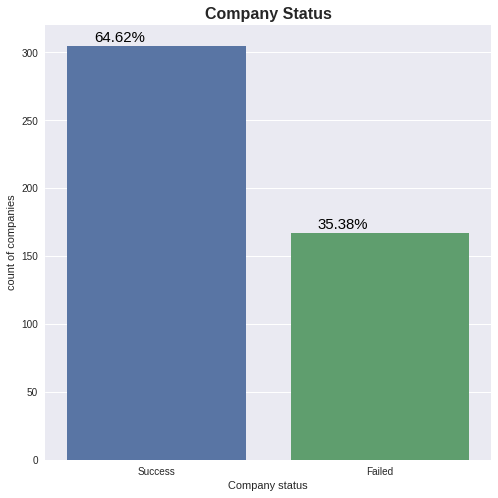

In [16]:
# checking the dependent variable --> `Company status`
plt.figure(figsize=(8,8))
ax=sns.countplot(df["Dependent-Company Status"])
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

- **Inferences from the bar chart above**
    - 64.62% companies or startups have succeded and
    - 35.38% companies or statrups have failed
    - we need to further analyse why startup fail or succed
    - it is balanced dataset

###  `year of founding`

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


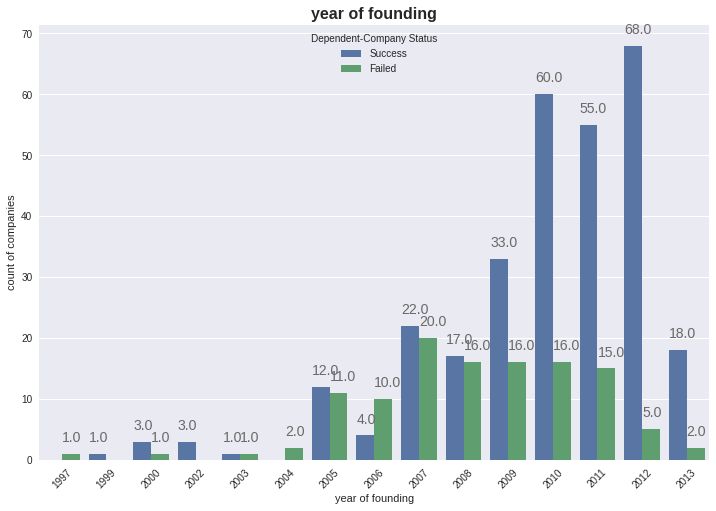

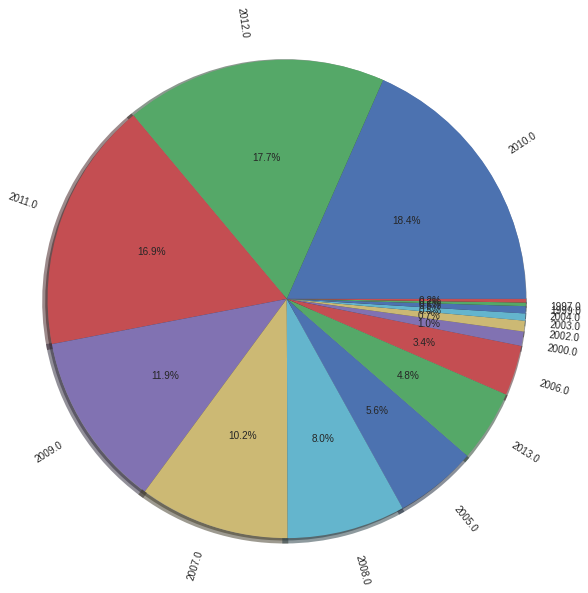

In [17]:
font={'weight' : 'bold',
        'size': 16}

###############################################################
#                       Count plot                            #
###############################################################

"""plt.figure(figsize=(12,8))
ax=sns.countplot(df["year of founding"].dropna().astype(int))
plt.title("year of founding",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, 
            str(round((i.get_height()), 2)), fontsize=16, color='dimgrey')
plt.show()
"""
###############################################################
#                   Count plot with Hue                       #
###############################################################
plt.figure(figsize=(12,8))
ax=sns.countplot(df["year of founding"].dropna().astype(int),hue=df["Dependent-Company Status"])
plt.title("year of founding",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()
###############################################################
#                       pie plot                              #
###############################################################
(df["year of founding"].value_counts()).plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.show()

- **Inferences from the above charts**
     - ***Bar chart***
        - From the bar chart we can see the year wise number of startups founded,but now we need to know whether the startup was successful or not so we apply hue to the bar plot in order to plot the number of startups succeded or failed in a particular year
        - Highest number of companies were founded in the year **2010** followed by year **2012** and **2011**.
        - Average number of companies were founded in years **2009,2007,2005,2008,2013**.
        - Very few startups were started in the remaining years.    
        - The highest success rate of companies is in the year **2012** which is about `93.15%`,i.e near about `93%` of startups founded in year **2012** were successfull.followed by year **2010** with `78.94%`and year **2011** with success rate of `78.57%`
        - The highest Failure rate of companies is in the year **2006** which is about `71.42%`,i.e near about `71%` of startups founded in year **2006** Failed.followed by year **2005** with `47.82%`and year **2007** with failure rate of `47.61%` 
        
  - ***Pie Chart***
       - `53%` of the startups were started in the years 2010,2011 and 2012.
       - Rest `47%` of the startups were founded in remaining years.            
           
  - ***In colclusion we can say that the craze of founding or starting a company was at its peak between the year 2009 and year 2012***

### `Age of company in years `

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


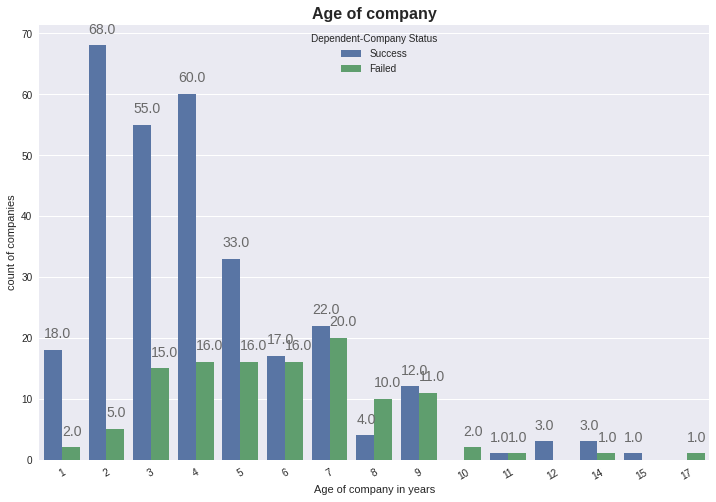

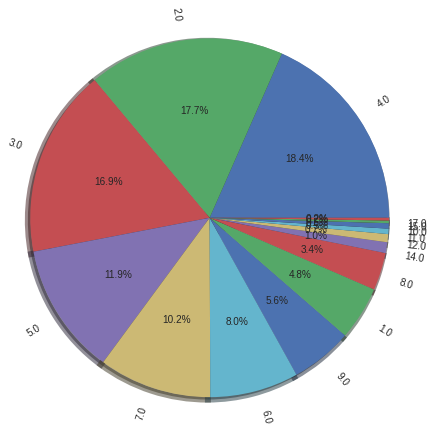

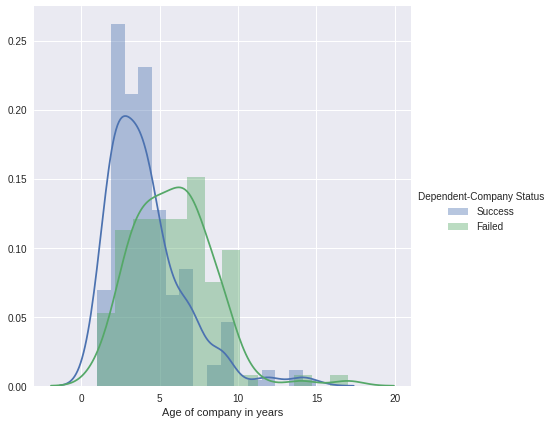

In [18]:
font={'weight' : 'bold',
        'size': 16}

###############################################################
#                   Count plot with Hue                       #                                                             
###############################################################

plt.figure(figsize=(12,8))

ax=sns.countplot(df["Age of company in years"].dropna().astype(int),hue=df["Dependent-Company Status"])
plt.title("Age of company",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=30)


for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()

###############################################################
#                       pie plot                              #                                                            
###############################################################

df["Age of company in years"].value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=1.5
                                                    )
plt.show()
###############################################################
#              distribution plot with hue                     #
###############################################################

sns.FacetGrid(df,hue='Dependent-Company Status',height=6)\
    .map(sns.distplot,'Age of company in years')\
    .add_legend()
plt.show()

- **Inferences from the above charts**
     - ***Bar chart***
        - The age of the companys which have age less than 5 years are more succesfull.
        
  - ***Pie Chart***
       - `53%` of the startups have age less than 5 years
       - Rest `47%` of the companies have age more than 5 years
  - ***Distribution plot***
    - From the distribution plot above we can infer that the Average age of the companies which have succeded is less than the age of companies which have failed.
    - In other words the companies or startups which have been founded recently are more successful as compared to the older startups.

### `Country of company`

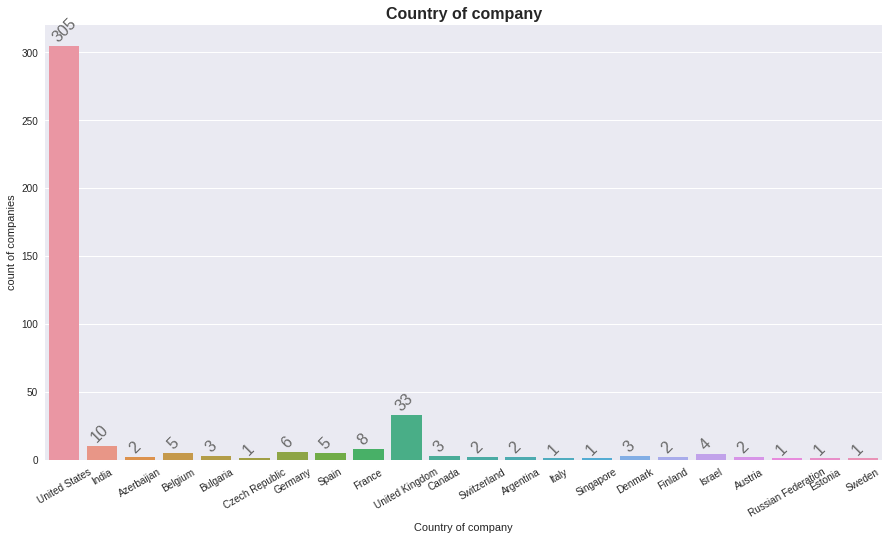

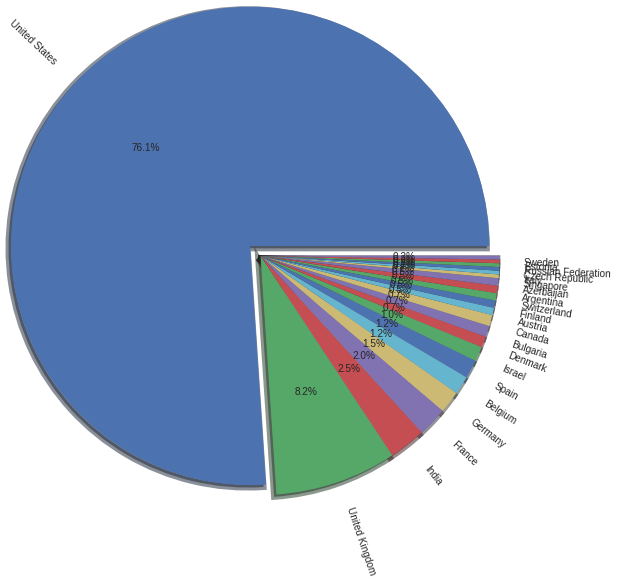

In [19]:

font={'weight' : 'bold',
        'size': 16}
###############################################################
#                       Count plot                            #
###############################################################
plt.figure(figsize=(15,8))
ax=sns.countplot(df["Country of company"].dropna())
plt.title("Country of company",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=30)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=16, color='dimgrey',rotation=45
                )
plt.show()
###############################################################
#                       pie plot                              #
###############################################################

df["Country of company"].value_counts().plot.pie(autopct="%.1f%%",explode=[0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},radius=2
                                                    )
plt.show()

### `Continent of company`

posx and posy should be finite values
posx and posy should be finite values


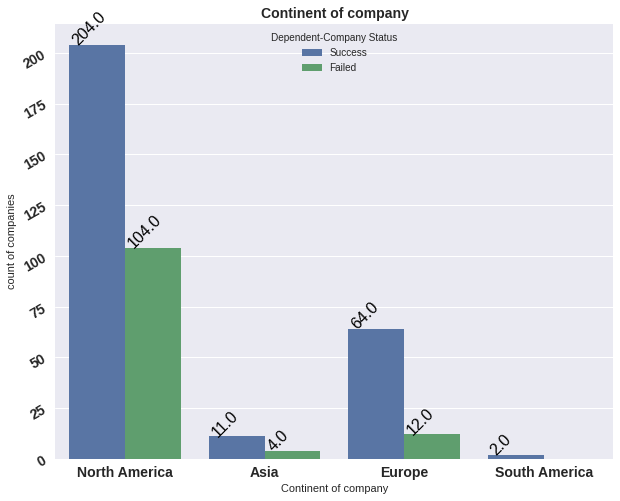

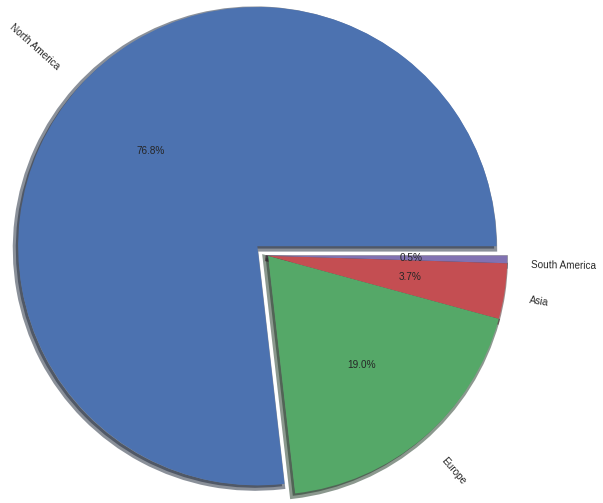

In [20]:
font={'weight' : 'bold',
        'size': 14}

###############################################################
#                   Count plot with Hue                       #                                                             
###############################################################

plt.figure(figsize=(10,8))
ax=sns.countplot(df["Continent of company"].dropna(),hue=df["Dependent-Company Status"])
plt.title("Continent of company",**font)
plt.ylabel("count of companies")
plt.yticks(rotation=30,**font)
plt.xticks(**font)


# create a list to collect the plt.patches data
for i in ax.patches:
    ax.text(i.get_x(),i.get_height(),str(round((i.get_height()), 2)), fontsize=16, color='Black',rotation=45)
    
plt.show()
###############################################################
#                       pie plot                              #
###############################################################

df["Continent of company"].value_counts().astype(int).plot.pie(autopct="%.1f%%",explode=[0.12,0.0,0.0,0.0], 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},radius=2,
                                                    )

plt.show()




- **OBSERVATIONS**
   - ***Bar chart***
        
        - The highest suceess rate(`100%`) is of the continent South America were only 2 companies were started and both of them are successful companies.
        - the second highest success rate is of the continent Europe with `84.21%` followed by Asia with `73.33%` and North America with `66.23%`
        
  - ***Pie Chart***
 
    - From the pie chart above it is clear that most of the startups are founded in North America which contributes about `76.8%` of the total share.
    - The continent followed by North America is Europe which contributes about `19%` of the total share.
    - only `2.5%` of startups were started in india

###  `Internet Activity Score`

<Figure size 720x720 with 0 Axes>

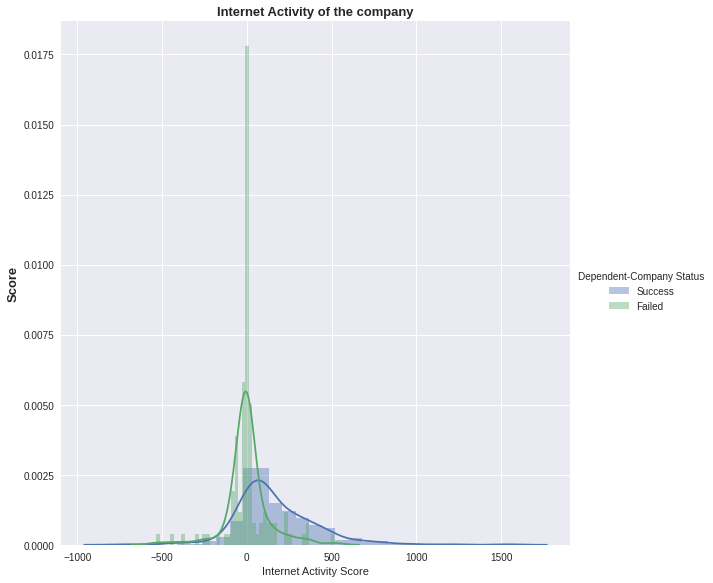

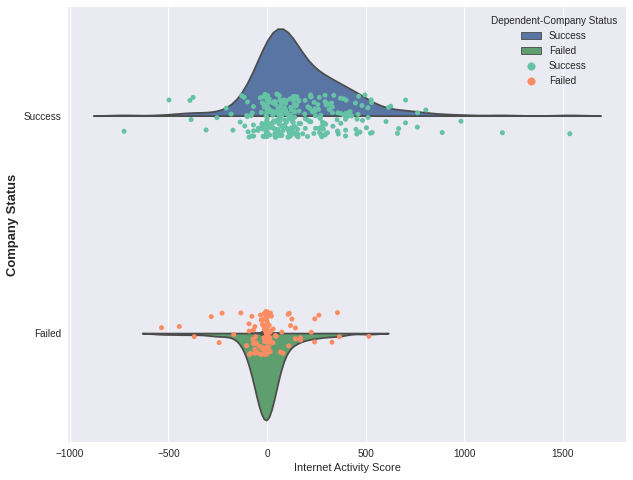

In [21]:
font={'weight' : 'bold',
        'size': 13}
plt.figure(figsize=(10,10))
###############################################################
#              distribution plot with hue                     #
###############################################################

sns.FacetGrid(df,hue='Dependent-Company Status',height=8)\
    .map(sns.distplot,'Internet Activity Score')\
    .add_legend()
plt.title("Internet Activity of the company",**font)
plt.ylabel("Score",**font)
plt.show()
###############################################################
#                Violin plot with hue                         #
###############################################################

plt.figure(figsize=(10,8))
sns.violinplot(data=df,y='Dependent-Company Status',x='Internet Activity Score',hue='Dependent-Company Status',
                   split=True)
sns.stripplot(data=df,y='Dependent-Company Status',x='Internet Activity Score',hue='Dependent-Company Status',jitter=True,palette="Set2")
plt.ylabel("Company Status",**font)
plt.show()

- **OBSERVATIONS**
    - `Internet Activity Score` specifies the activeness of the startups on the internet.
    - As we can see in the figures above the companies which are successful have high internet activity score which ranges from 0-1000 as per the distribution of the successful companies.
    - In contrast it is very obvious that the score of the companies which didnt succeed have very low internet activity score which also shows that they have poor online marketing strategies.
    - Hence we can say that the companies which do not have good online marketing strategies may fail.

### Analysis of startups w.r.t founders and co-founders 

posx and posy should be finite values
posx and posy should be finite values


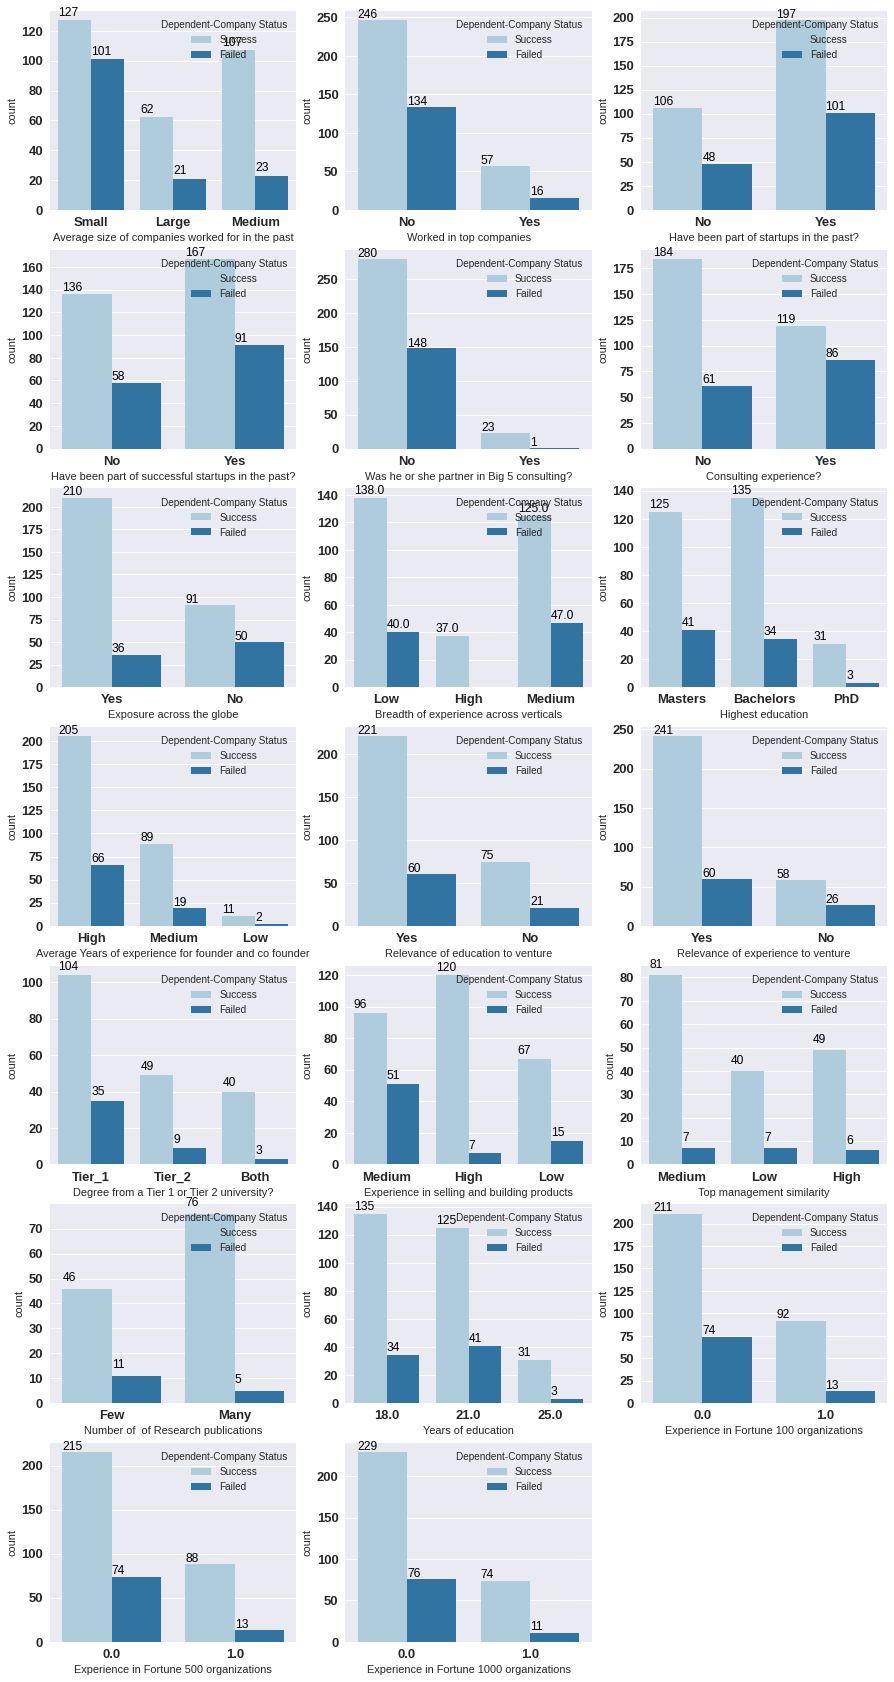

In [22]:
# columns related to founders and co-founders
cat_columns=["Average size of companies worked for in the past",'Worked in top companies',
"Have been part of startups in the past?","Have been part of successful startups in the past?",
"Was he or she partner in Big 5 consulting?","Consulting experience?","Exposure across the globe",
"Breadth of experience across verticals","Highest education",'Average Years of experience for founder and co founder',
"Relevance of education to venture","Relevance of experience to venture","Degree from a Tier 1 or Tier 2 university?",
"Experience in selling and building products","Top management similarity","Number of  of Research publications","Years of education",
"Experience in Fortune 100 organizations","Experience in Fortune 500 organizations","Experience in Fortune 1000 organizations"]


###############################################################
#                   Count plot with Hue                       #                                                             
###############################################################

q=1
plt.figure(figsize=(15,30))
for j in cat_columns:
    plt.subplot(7,3,q)
    ax=sns.countplot(df[j].dropna(),palette="Paired",hue=df["Dependent-Company Status"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    for i in ax.patches:
        ax.text(i.get_x(),i.get_height()+3,str(round((i.get_height()), 2)), fontsize=12, color='Black')
    q+=1
plt.show()



- ***SOME INTRESTING INFERENCES/OBSERVATIONS***
     - Startups founded by founders who worked in top companies in the past are more successfull.
     - Startups founded by founders who published many research papers succeeded.
     - Founders of companies which have degress from top universities are more successfull.
     - Intrestingly founders who own a bachelors degree are more successfull than one who own P.hd or Masters degree.
     - Founders who have more consulting experiance are more successfull.

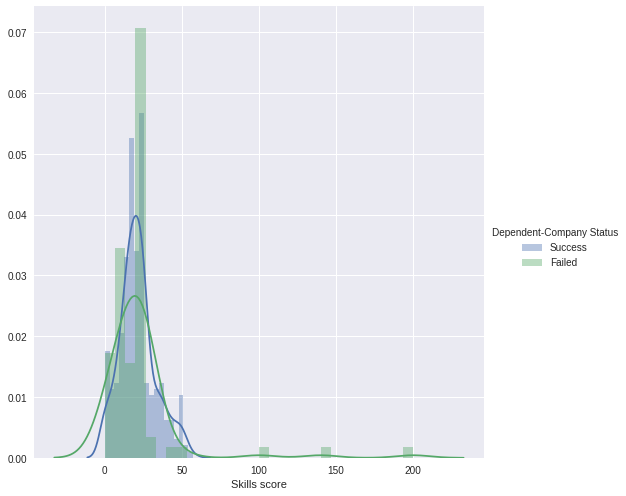

In [23]:
# skill score of the founder and co-founder with respect to company status
sns.FacetGrid(df,hue='Dependent-Company Status',height=7)\
.map(sns.distplot,"Skills score")\
.add_legend()
plt.show()

- The Plot above infers that the skill Score of founder or co-founder do not affect the company status.
- The distribution of both succeeded and failed is same

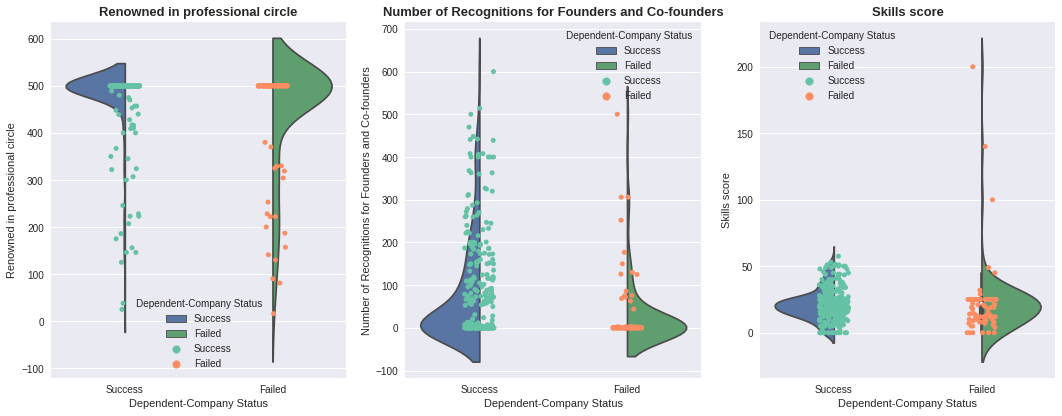

In [24]:
num_columns=["Renowned in professional circle","Number of Recognitions for Founders and Co-founders","Skills score"]

i=1
plt.figure(figsize=(18,38))
for j in num_columns:
    plt.subplot(5,3,i)
    sns.violinplot(data=df,x='Dependent-Company Status',y=df[j],hue='Dependent-Company Status',
                   split=True)
    sns.stripplot(data=df,x='Dependent-Company Status',y=df[j],hue='Dependent-Company Status',jitter=True,palette="Set2")
    plt.title(j,**font)
    i+=1
plt.show()

## *.........................IN PROGRESS....................................*